In [1]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import re
import os
import itertools
from skimage.filters import threshold_otsu
from skimage import data, filters, measure, morphology, color
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from skimage.io import imread
import math

(512, 512)
1903


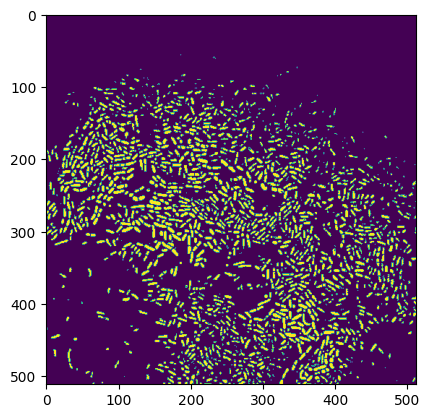

In [8]:
im = Image.open("DC1_images\\DC1_1_1.tif")
im = np.asarray(im, dtype = np.float64)
im = im > 0
objects = measure.label(im)
props = measure.regionprops(objects, im)

print(objects.shape)
print(len(props))

ob = plt.imshow(im)

=========================================================================================================================

In [3]:
from Functions import Import_New, Get_Props, Relative_Orientation, Relative_Orientation_vector

In [3]:
image_DC1 = Import_New("DC1_images")

#### image_DC1.get(0)[1]  => used to access the images names of files and image are both in the dictionary

In [4]:
image_DC1_new = Get_Props(image_DC1)

In [5]:
results_dict = Relative_Orientation(image_DC1_new)

0/8 , time taken = 47.04444122314453
1/8 , time taken = 110.79333066940308
2/8 , time taken = 73.31462240219116
3/8 , time taken = 130.63226461410522
4/8 , time taken = 100.36428904533386
5/8 , time taken = 238.30351853370667
6/8 , time taken = 90.36842107772827
7/8 , time taken = 86.31860828399658


In [9]:
res_dict = Relative_Orientation_vector(image_DC1_new)

C:\AA - Jonathan\University Work\Year 4\SH\SH-Project-Code\Functions.py:216: RuntimeWarning: invalid value encountered in scalar divide
  rel_align = np.arccos(vector.dot(vector_iplus)/(np.linalg.norm(vector)*np.linalg.norm(vector_iplus)))
C:\AA - Jonathan\University Work\Year 4\SH\SH-Project-Code\Functions.py:218: RuntimeWarning: invalid value encountered in scalar divide
  cosine_rel_align = (vector.dot(vector_iplus)/(np.linalg.norm(vector)*np.linalg.norm(vector_iplus)))
C:\AA - Jonathan\University Work\Year 4\SH\SH-Project-Code\Functions.py:216: RuntimeWarning: invalid value encountered in arccos
  rel_align = np.arccos(vector.dot(vector_iplus)/(np.linalg.norm(vector)*np.linalg.norm(vector_iplus)))


0/8 , time taken = 58.1823205947876
1/8 , time taken = 122.38222217559814
2/8 , time taken = 103.6173963546753
3/8 , time taken = 166.63996362686157
4/8 , time taken = 137.68909668922424
5/8 , time taken = 338.83828568458557
6/8 , time taken = 122.75856947898865
7/8 , time taken = 134.85306692123413


In [ ]:
print(len(results_dict[1][1]))

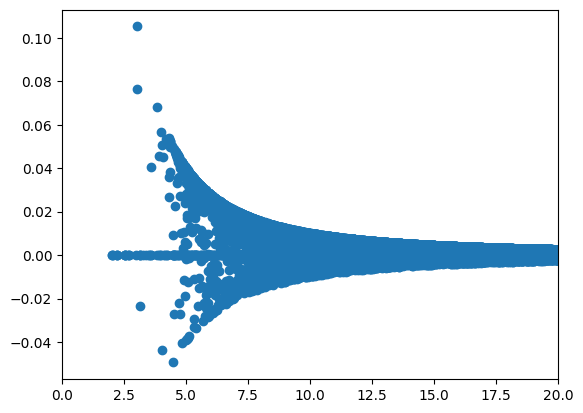

In [11]:
plt.scatter(results_dict[1][0], results_dict[1][3]/results_dict[1][1])
plt.xlim(0, 20)
plt.show()

In [7]:
plt.imshow(image_DC1_new[1][1], cmap=plt.cm.gray)
area = []
for i in image_DC1_new[1][2]:
    plt.scatter(i.centroid[1], i.centroid[0], s=1)
    area.append(i.area)
plt.show()

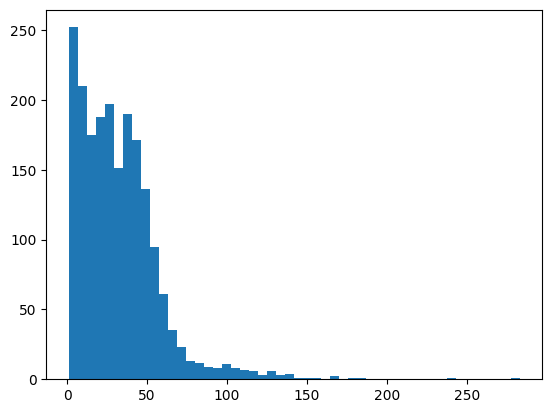

In [10]:
plt.hist(area, bins=50)
plt.show()

## ---------------------------------------------------------------------------------------------------------

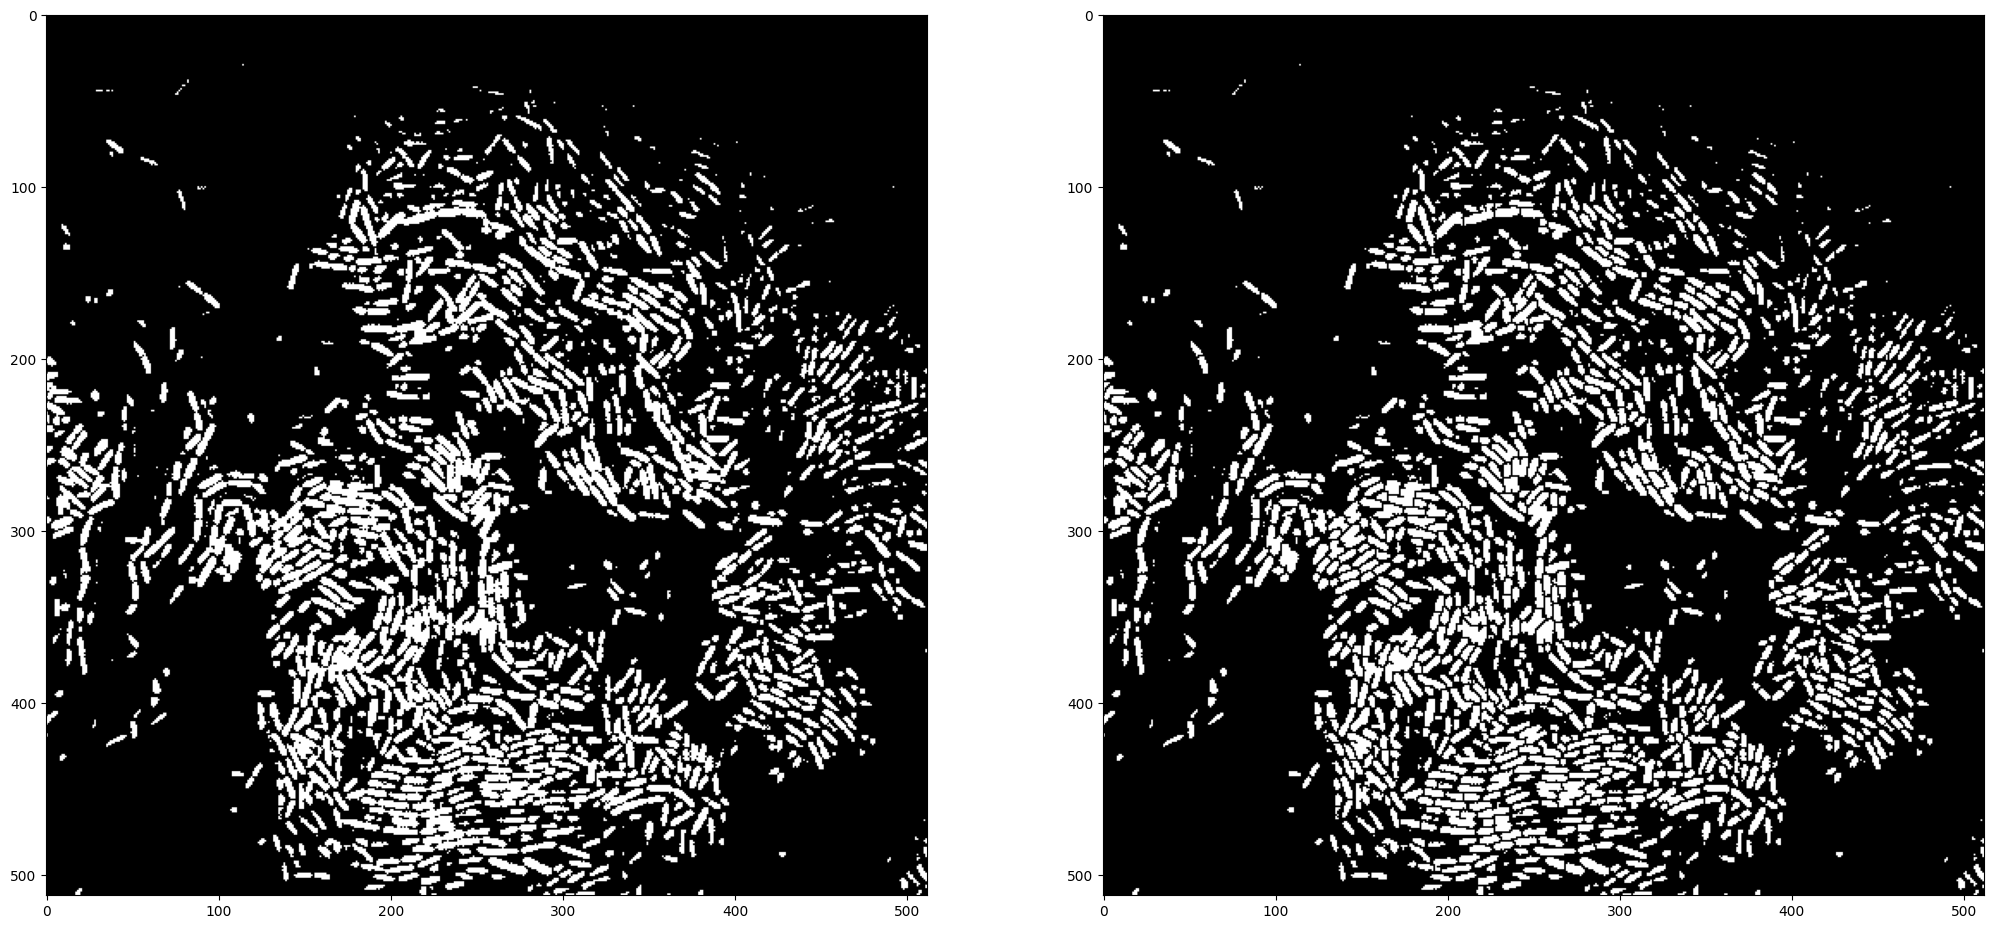

In [6]:
image_test = Image.open("Test_images\\test_DC1_9.tif")
test_arr = np.asarray(image_test, dtype = np.float64)
image_test = Image.open("Test_images\\test_DC1_9_Watershed.tif")
test_W_arr = np.asarray(image_test, dtype = np.float64)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(25,12))
ax1.imshow(test_arr, cmap=plt.cm.gray)
ax2.imshow(test_W_arr, cmap=plt.cm.gray)
plt.show()

plt.imshow(test_arr - test_W_arr, cmap=plt.cm.gray)
plt.show()

# =================================================================

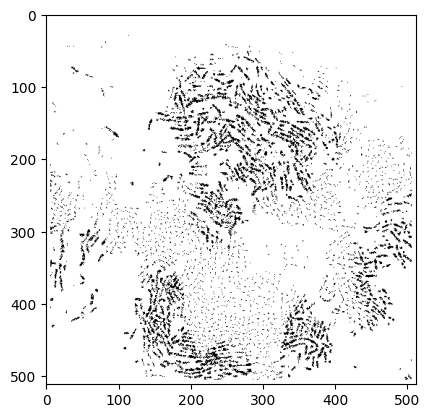

In [47]:
no_thresh = imread('30c_4.tif')
plt.imshow(no_thresh)
plt.show()
no_thresh[]

local_maxi = peak_local_max(distance, min_distance = 6, footprint=np.ones((3, 3)), threshold_rel=0.1, labels=no_thresh)  # indices=False, removed
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(local_maxi.T)] = True
plt.imshow(~mask, cmap='gray')

In [7]:
binary_image = test_arr > 0  # Ensure the image is in binary format

im_test = imread("Test_images\\test_DC1_9_despeck.tif", as_gray=True)
im_test = im_test > 0

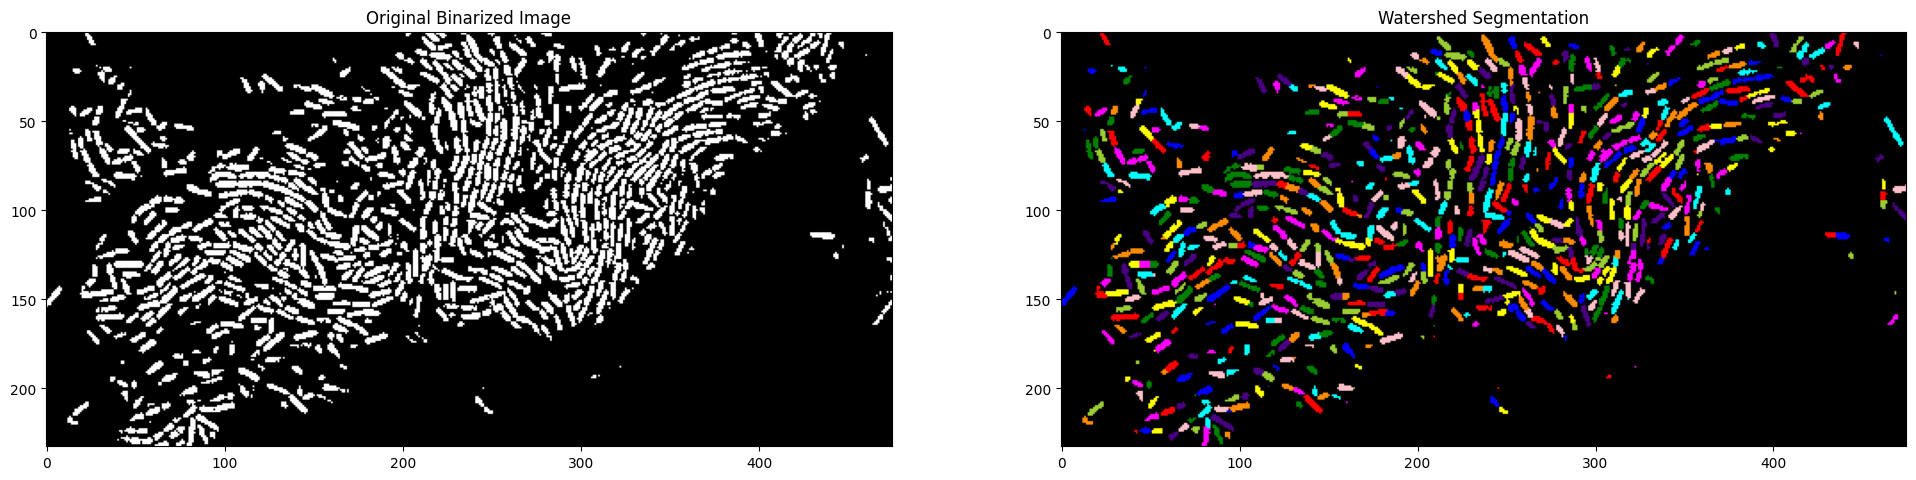

In [10]:
#sharpen, threshold, watershed in imageJ
# relative theta into correlation func. => bin values and take mids to plot.

# use the alignment as a unit vector and take the dot product => to get relative alignment cos(theta).
# get euclidean distance between centroids , dot of orientations

# discussion = cell alignment as a function of time and temp ( potenitally a time related mechanism aswell ) future study etc.
# correlation length against T => exp(- distance /correlation length)

im_test = imread("Ch2.tif", as_gray=True)
im_test = im_test > 0
distance = ndi.distance_transform_edt(im_test)
dis = ndi.distance_transform_edt(im_test)

# Find local maxima (these will be the markers)
local_maxi = peak_local_max(distance, min_distance = 6, footprint=np.ones((3, 3)), labels=im_test)

mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(local_maxi.T)] = True

# Label the markers
markers, num = ndi.label(mask)   #, structure=distance)
labels = watershed(-distance, markers, mask=im_test)

fig, ax = plt.subplots(1, 2, figsize=(24, 12))
ax[0].imshow(im_test, cmap='gray')
ax[0].set_title('Original Binarized Image')

rgb_obj = color.label2rgb(labels, bg_label=0)
ax[1].imshow(rgb_obj)
ax[1].set_title('Watershed Segmentation')
plt.show()

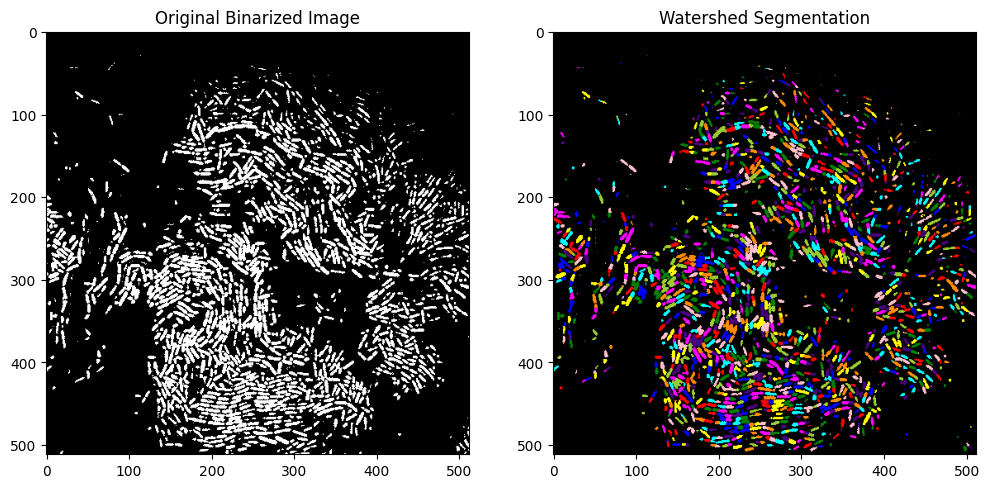

In [8]:
distance = ndi.distance_transform_edt(binary_image)
dis = ndi.distance_transform_edt(im_test)

# Find local maxima (these will be the markers)
local_maxi = peak_local_max(distance, min_distance = 6, footprint=np.ones((3, 3)), labels=binary_image)  # indices=False, removed

mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(local_maxi.T)] = True

# Label the markers
markers, num = ndi.label(mask)   #, structure=distance)
labels = watershed(-distance, markers, mask=binary_image)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(binary_image, cmap='gray')
ax[0].set_title('Original Binarized Image')

rgb_obj = color.label2rgb(labels, bg_label=0)
ax[1].imshow(rgb_obj)
ax[1].set_title('Watershed Segmentation')
plt.show()
#==========================DESPECK IMAGE==========================================
dis = ndi.distance_transform_edt(im_test)

# Find local maxima (these will be the markers)
loc_max = peak_local_max(dis, min_distance = 6, footprint=np.ones((3, 3)), labels=im_test)

mask = np.zeros(dis.shape, dtype=bool)
mask[tuple(loc_max.T)] = True

# Label the markers
markers, num = ndi.label(mask)   #, structure=distance)
labels_speck = watershed(-dis, markers, mask=binary_image)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(im_test, cmap='gray')
ax[0].set_title('W/ Speckal Removed')

rgb_obj_speck = color.label2rgb(labels_speck, im_test, alpha=0.75, bg_label=0)
ax[1].imshow(rgb_obj_speck)
ax[1].set_title('W/ Speck reomved - Watershed Segmentation')
plt.show()

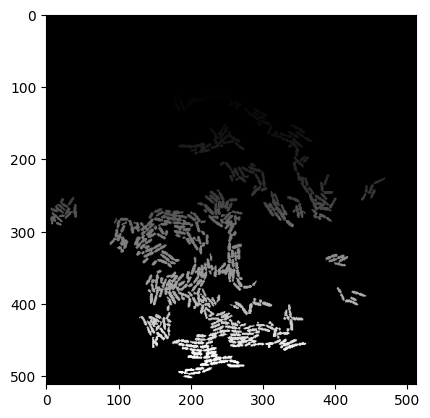

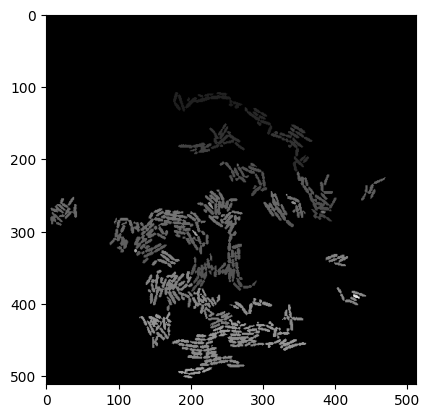

-


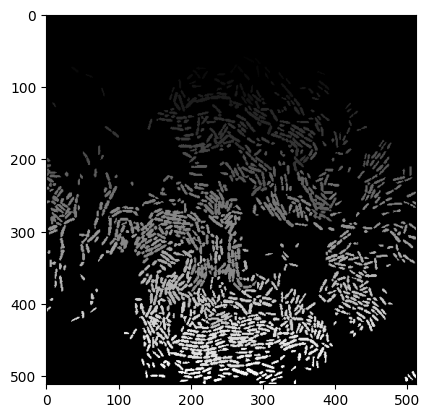

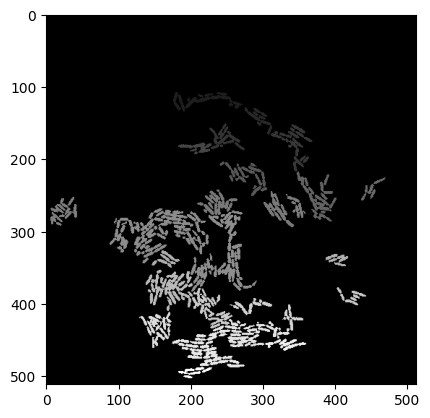

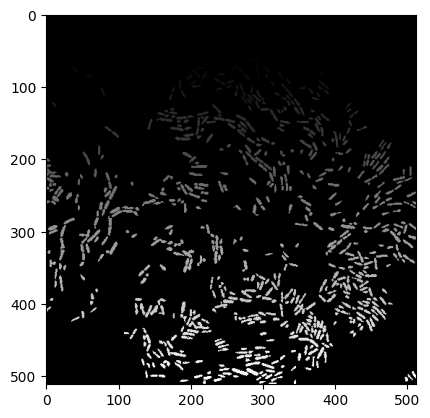

In [72]:
test_arr = test_arr > 0
objects = measure.label(test_arr)
large_objects = morphology.remove_small_objects(objects, min_size=15)

_objects = morphology.remove_small_objects(objects, min_size=220)
dis = ndi.distance_transform_edt(_objects)
loc_max = peak_local_max(dis, min_distance = 6, footprint=np.ones((5, 5)), labels=_objects)
mask = np.zeros(dis.shape, dtype=bool)
mask[tuple(loc_max.T)] = True
markers, num = ndi.label(mask)
labels = watershed(-dis, markers, mask=_objects)


objects = large_objects - _objects

plt.imshow(_objects, cmap='gray')
plt.show()
plt.imshow(labels, cmap='gray')
plt.show()
plt.imshow(_objects-labels, cmap='gray')
plt.show()
print('-')

small_objects = objects ^ large_objects

plt.imshow(large_objects, cmap='gray')
plt.show()
plt.imshow(small_objects, cmap='gray')
plt.show()
plt.imshow(objects, cmap='gray')
plt.show()

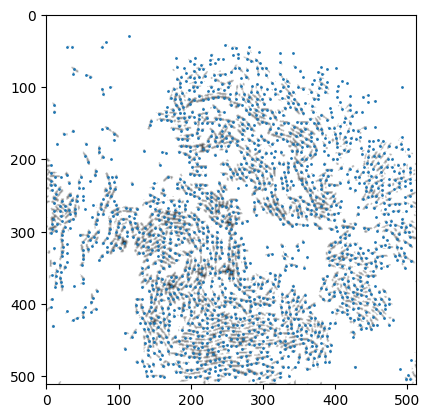

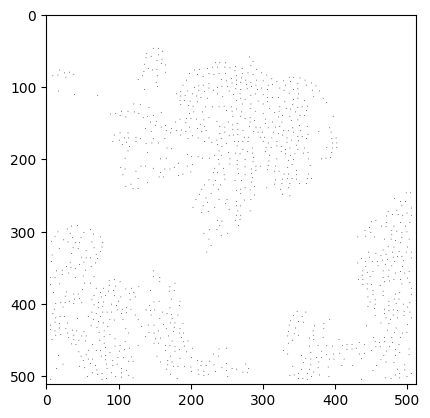

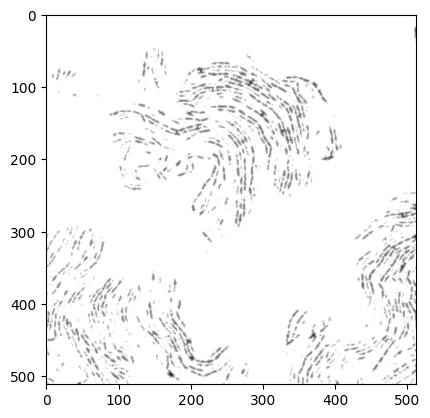

In [31]:
plt.imshow(-distance, cmap='gray')
plt.scatter( local_maxi[:,1], local_maxi[:,0], s=1)
plt.show()
plt.imshow(~mask, cmap='gray')
plt.show()
plt.imshow(-dis, cmap='gray')
plt.show()

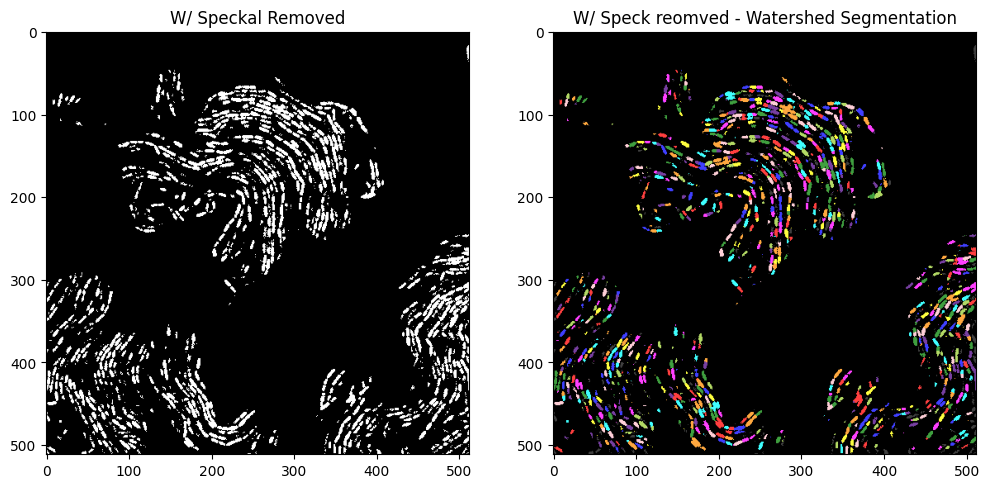

In [15]:
im_test = imread("30c_4_thresh.tif", as_gray=True)
im_test = im_test > 0

dis = ndi.distance_transform_edt(im_test)

# Find local maxima (these will be the markers)
loc_max = peak_local_max(dis, min_distance = 6, footprint=np.ones((3, 2)), labels=im_test)

mask = np.zeros(dis.shape, dtype=bool)
mask[tuple(loc_max.T)] = True

# Label the markers
markers, num = ndi.label(mask)   #, structure=distance)
labels_speck = watershed(-dis, markers, mask=im_test)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(im_test, cmap='gray')
ax[0].set_title('W/ Speckal Removed')

rgb_obj_speck = color.label2rgb(labels_speck, im_test, alpha=0.75, bg_label=0)
ax[1].imshow(rgb_obj_speck)
ax[1].set_title('W/ Speck reomved - Watershed Segmentation')
plt.show()

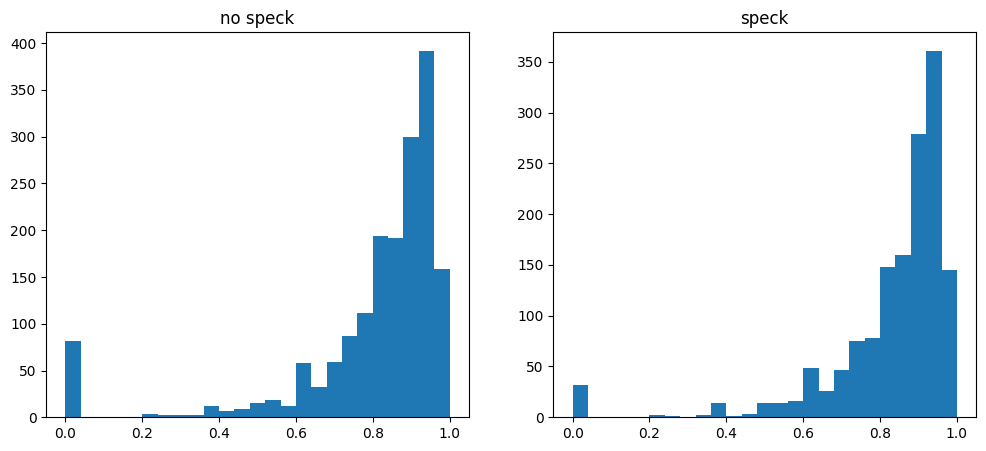

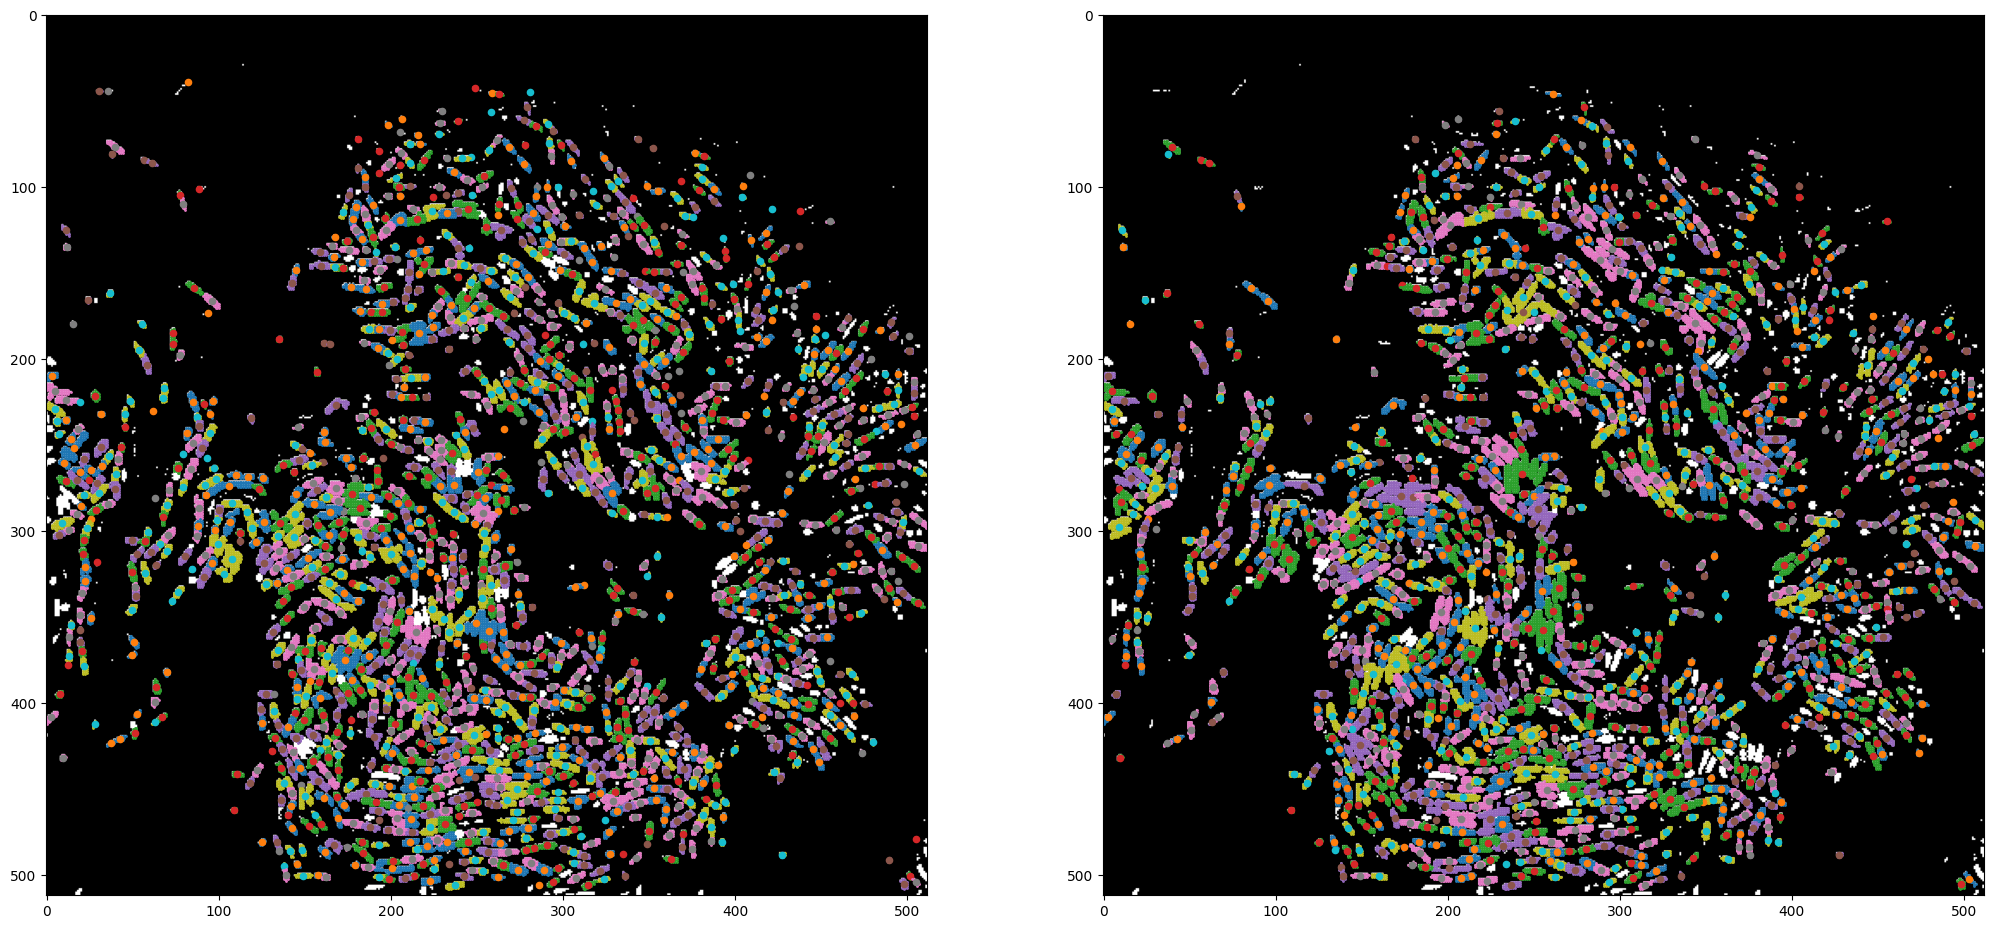

In [89]:
props = measure.regionprops(labels, binary_image)

props_speck = measure.regionprops(labels_speck, im_test)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
fig, (ax3,ax4) = plt.subplots(1,2, figsize=(25,12))

ecc = []
ecc_speck = []
for i in props:
    ecc.append(i.eccentricity)
    if i.eccentricity > 0.5:
        ax3.scatter(i.coords[:,1], i.coords[:,0], s=1)
        ax3.scatter(i.centroid[1], i.centroid[0], s=20)
    
for i in props_speck:
    ecc_speck.append(i.eccentricity)
    if i.eccentricity > 0.5:
        ax4.scatter(i.coords[:,1], i.coords[:,0], s=1)
        ax4.scatter(i.centroid[1], i.centroid[0], s=20)

        
ax1.hist(ecc, bins=25)
ax1.set_title('no speck')
ax2.hist(ecc_speck, bins=25)
ax2.set_title('speck')

ax3.imshow(binary_image, cmap=plt.cm.gray)
ax4.imshow(binary_image, cmap=plt.cm.gray)
plt.show()

# ======================================================

In [4]:
labels = measure.label(test_arr)
props = measure.regionprops(labels, test_arr)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(25,12))

for i in props:
    if (5 <= i.area):
        ax1.scatter(i.coords[:,1], i.coords[:,0], s=1)
        ax2.scatter(i.centroid[1], i.centroid[0], s=20)
        
ax1.imshow(test_arr, cmap=plt.cm.gray)
ax2.imshow(test_arr, cmap=plt.cm.gray)
ax1.set_title('no watershed in ImageJ'), ax2.set_title('centriod of detected objects (no watershed)')
plt.show()

labels_W = measure.label(test_W_arr)
props_W = measure.regionprops(labels_W, test_W_arr)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(25,12))

for i in props_W:
    if (5 <= i.area):
        ax1.scatter(i.coords[:,1], i.coords[:,0], s=1)
        ax2.scatter(i.centroid[1], i.centroid[0], s=20)
 
ax1.imshow(test_arr, cmap=plt.cm.gray)
ax2.imshow(test_arr, cmap=plt.cm.gray)
ax1.set_title('with watershed in ImageJ'), ax2.set_title('Centroids of detected objects (w/ watershed)')
plt.show()

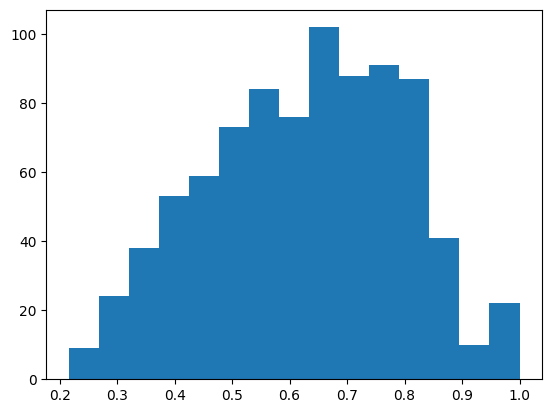

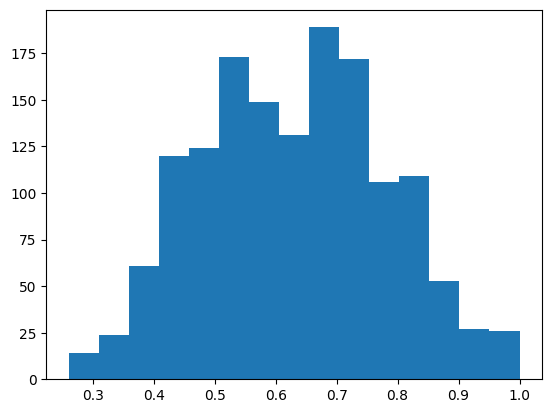

In [7]:
area_L = []
extent_L = []
for i in props:
    if (5 <= i.area <= 100):
        area_L.append(i.area)
        extent_L.append(i.extent)
plt.hist(area_L, bins=25)
plt.title('Area distribution (no Watershed)')
plt.show()

area_W_L = []
extent_W_L = []
for i in props_W:
    if (5 <= i.area <= 100):
        area_W_L.append(i.area)
        extent_W_L.append(i.extent)
plt.hist(area_W_L, bins=25)
plt.title('Area distribution (w/ Watershed)')
plt.show()

plt.hist(extent_L, bins=15)
plt.show()
plt.hist(extent_W_L, bins=15)
plt.show()

In [42]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(25,12))
for i in props_W:
    if (5 <= i.area <= 60):
        ax1.scatter(i.coords[:,1], i.coords[:,0], s=1)
    elif (i.area > 60):
        ax2.scatter(i.coords[:,1], i.coords[:,0], s=1)

ax1.imshow(test_arr, cmap=plt.cm.gray)
ax2.imshow(test_arr, cmap=plt.cm.gray)
ax1.set_title('Acceptable objects (w/ watershed)'), ax2.set_title('Removed objects (w/ watershed)')
plt.show()

In [59]:
dot_prod_minor_L = []
dot_prod_major_L = []

def finding_orient(props):
    y0, x0 = props.centroid
    orientation = props.orientation
    print(orientation)
    x1 = x0 + math.cos(orientation) * 0.5 * props.axis_minor_length
    y1 = y0 - math.sin(orientation) * 0.5 * props.axis_minor_length
    x2 = x0 - math.sin(orientation) * 0.5 * props.axis_major_length
    y2 = y0 - math.cos(orientation) * 0.5 * props.axis_major_length

    vect_major = np.array([x1-x0, y1-y0])
    vect_minor = np.array([x2-x0, y2-y0])
    x_axis_major = np.array([0, y0])
    x_axis_minor = np.array([0, y0])

    dot_prod_minor = vect_minor.dot(x_axis_minor)
    print(dot_prod_minor)
    dot_prod_major = vect_major.dot(x_axis_major)
    angle_major = np.arccos(180/np.pi * ((np.linalg.norm(vect_minor)*np.linalg.norm(x_axis_minor))/dot_prod_minor))
    print(str(orientation) + ' : ' + str(angle_major) + ' : ' + str((np.linalg.norm(vect_minor)*np.linalg.norm(x_axis_minor))/dot_prod_minor))
    print(str(math.cos(orientation)) + ' original angle : ' + str(math.cos(orientation*180/np.pi)))
    print(np.linalg.norm(vect_minor))

for i in props_W:
    finding_orient(i)

-0.7853981633974483
0.0
-0.7853981633974483 : nan : nan
0.7071067811865476 original angle : 0.5253219888177297
0.0
0.0
-38.5
0.0 : nan : -1.0
1.0 original angle : 1.0
1.0
1.5707963267948966
0.0
1.5707963267948966 : nan : inf
6.123233995736766e-17 original angle : -0.4480736161291701
1.0
1.5707963267948966
0.0
1.5707963267948966 : nan : inf
6.123233995736766e-17 original angle : -0.4480736161291701
1.6329931618554383
-0.7144496360953664
-103.3526674369586
-0.7144496360953664 : nan : -1.3237074124599475
0.7554539549957063 original angle : -0.9955622895863687
3.0537654460671866
1.5707963267948966
0.0
1.5707963267948966 : nan : inf
6.123233995736766e-17 original angle : -0.4480736161291701
2.23606797749979
1.5707963267948966
0.0
1.5707963267948966 : nan : inf
6.123233995736766e-17 original angle : -0.4480736161291701
1.0
-0.7853981633974483
0.0
-0.7853981633974483 : nan : nan
0.7071067811865476 original angle : 0.5253219888177297
0.0
-0.7853981633974483
0.0
-0.7853981633974483 : nan : nan


C:\Users\jonat\AppData\Local\Temp\ipykernel_7524\521685738.py:21: RuntimeWarning: invalid value encountered in scalar divide
  angle_major = np.arccos(180/np.pi * ((np.linalg.norm(vect_minor)*np.linalg.norm(x_axis_minor))/dot_prod_minor))
C:\Users\jonat\AppData\Local\Temp\ipykernel_7524\521685738.py:22: RuntimeWarning: invalid value encountered in scalar divide
  print(str(orientation) + ' : ' + str(angle_major) + ' : ' + str((np.linalg.norm(vect_minor)*np.linalg.norm(x_axis_minor))/dot_prod_minor))
C:\Users\jonat\AppData\Local\Temp\ipykernel_7524\521685738.py:21: RuntimeWarning: invalid value encountered in arccos
  angle_major = np.arccos(180/np.pi * ((np.linalg.norm(vect_minor)*np.linalg.norm(x_axis_minor))/dot_prod_minor))
C:\Users\jonat\AppData\Local\Temp\ipykernel_7524\521685738.py:21: RuntimeWarning: divide by zero encountered in scalar divide
  angle_major = np.arccos(180/np.pi * ((np.linalg.norm(vect_minor)*np.linalg.norm(x_axis_minor))/dot_prod_minor))
C:\Users\jonat\AppData\

-0.7853981633974483 : nan : nan
0.7071067811865476 original angle : 0.5253219888177297
0.0
0.9815987578958855
-1517.944844667884
0.9815987578958855 : nan : -1.7995513211118264
0.5556940712211347 original angle : 0.9531834670230277
8.23746207596506
-0.6550969675237778
-978.1639894315745
-0.6550969675237778 : nan : -1.2610517698949508
0.7929888557099439 original angle : 0.9864478338813906
3.7297411608263578
-0.8791897671570065
-562.3496805981787
-0.8791897671570065 : nan : -1.567950064712089
0.6377754129457031 original angle : 0.9941325704488732
2.673446937531891
-0.1450820687468106
-1647.978201496836
-0.1450820687468106 : nan : -1.010617502787218
0.9894940442274789 original angle : -0.44270089964171394
5.016084472270786
0.7476458611502724
-1443.9808868728333
0.7476458611502724 : nan : -1.3637141346785226
0.7332915121802552 original angle : 0.41273215646243183
5.9175457450863265
0.42207699305658547
-609.8010096943423
0.42207699305658547 : nan : -1.0962026866027526
0.912240055804918 origi

# IMAGES THRESHOLDED IN PYTHON

In [21]:
im_array = np.asarray(image, dtype = np.float64)
    
threshold = threshold_otsu(im_array)
m_def = np.empty_like(im_array, dtype=bool)
m_def = im_array > threshold
m_x1p5 = np.empty_like(im_array, dtype=bool)
m_x1p5 = im_array > threshold*1.5
labels_def = measure.label(m_def)
props_def = measure.regionprops(labels_def, im_array*m_def)
labels_x1p5 = measure.label(m_x1p5)
props_x1p5 = measure.regionprops(labels_x1p5, im_array*m_x1p5)

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,6))
ax1.set_title('Default otzu -> Cell Area')
ax1.hist(area_def, bins=13)
ax2.set_title('Default*1.5 otzu -> Cell Area')
ax2.hist(area_x1p5, bins=25)
plt.show()

In [ ]:
distance = ndi.distance_transform_edt(im_array*m2)
coords = peak_local_max(distance, footprint=np.ones((2, 1)), labels=im_thresh_array)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)
labels = watershed(-distance, markers, mask=im_thresh_array)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(25,12))

ax1.imshow(-distance, cmap=plt.cm.gray)
ax1.set_title('distance ')
ax2.imshow(labels, cmap=plt.cm.nipy_spectral)
ax2.set_title('separated objects? (maybe)')
plt.show()

labels_water = measure.label(labels)
props_water = measure.regionprops(labels_water, labels)
#################################################################################################
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(25,12))
fig, (ax3,ax4) = plt.subplots(1,2, figsize=(25,12))
fig, (ax5,ax6) = plt.subplots(1,2, figsize=(25,12))
fig, (ax7,ax8) = plt.subplots(1,2, figsize=(25,12))
for i in props_water:
    #if i.area != 0 and i.extent != 1.0:
    if (5 <= i.area <= 50):     # should cover the extent condition and non-zero condition
        area_filter.append(i.area)
        extent.append(i.extent)
        ax2.scatter(i.centroid[1], i.centroid[0], s=20)

        ax7.scatter(i.centroid[1], i.centroid[0], s=20)
        
    elif (i.area > 50 and i.extent != 1.0):
        ax4.scatter(i.coords[:,1], i.coords[:,0], s=1)
        ax4.scatter(i.centroid[1], i.centroid[0], s=20)
        
        ax7.scatter(i.coords[:,1], i.coords[:,0], s=1)
        
        labels = WaterShed(im_thresh_array[i.coords])
        labels_Water = measure.label(labels)
        #ax5.imshow(labels)
        props_Water = measure.regionprops(labels_Water, labels)
        for i in props_Water:
            ax6.scatter(i.coords[:,1], i.coords[:,0], s=1)
    elif (i.area < 5):
        ax3.scatter(i.coords[:,1], i.coords[:,0], s=1)
        #ax3.scatter(i.centroid[1], i.centroid[0], s=10)

ax2.imshow(im_array, cmap=plt.cm.gray)
ax3.imshow(im_array, cmap=plt.cm.gray)
ax4.imshow(im_array, cmap=plt.cm.gray)
ax5.imshow(im_array, cmap=plt.cm.gray)
ax6.imshow(im_array, cmap=plt.cm.gray)
ax7.imshow(im_array, cmap=plt.cm.gray)
ax3.set_title('Areas < 5'), ax4.set_title('Areas > 50')
ax5.set_title('?'), ax6.set_title('Area > 50, post watershed')
plt.show()

In [ ]:
footprint = morphology.disk(1)
res = morphology.white_tophat(im_array*m, footprint)
im_array_cleaned = np.asarray(((im_array*m)-res), dtype = np.float64)

footprint_alt = morphology.ellipse(width = 1, height = 2, dtype=bool)
res_alt = morphology.white_tophat(im_array*m, footprint_alt)
im_array_alt = np.asarray(((im_array*m)-res_alt), dtype = np.float64)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(25,12))
ax1.imshow(im_array*m, cmap=plt.cm.gray)
ax1.set_title('Original')
ax2.imshow(im_array_cleaned, cmap=plt.cm.gray)
ax2.set_title('cleaned image - disk')
plt.show()

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(25,12))
ax1.imshow(im_array*m, cmap=plt.cm.gray)
ax1.set_title('Original')
ax2.imshow(im_array_alt, cmap=plt.cm.gray)
ax2.set_title('cleaned image - ellipse')
plt.show()

# IMAGES THRESHOLDED IN imageJ AND THEN IMPORTED

In [ ]:
import skimage
from scipy import ndimage as ndi
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from skimage.color import label2rgb

In [ ]:
im_thresh_array = np.asarray(im_thresh, dtype = np.int64)
distance = ndi.distance_transform_edt(im_thresh_array)
coords = peak_local_max(distance, footprint=np.ones((2, 1)), labels=im_thresh_array)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)
labels = watershed(-distance, markers, mask=im_thresh_array)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(25,12))

ax1.imshow(-distance, cmap=plt.cm.gray)
ax1.set_title('distance ')
ax2.imshow(labels, cmap=plt.cm.nipy_spectral)
ax2.set_title('separated objects? (maybe)')
plt.show()

labels_water = measure.label(labels)
props_water = measure.regionprops(labels_water, labels)

image_label_overlay = label2rgb(labels_water, image=labels, bg_label=0)

In [ ]:
def WaterShed(Array):
    distance = ndi.distance_transform_edt(Array)
    coords = peak_local_max(distance, footprint=np.ones((1, 1)), labels=Array)
    mask = np.zeros(distance.shape, dtype=bool)
    mask[tuple(coords.T)] = True
    markers, _ = ndi.label(mask)
    labels = watershed(-distance, markers, mask=Array)
    return labels

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(25,12))
fig, (ax3,ax4) = plt.subplots(1,2, figsize=(25,12))
fig, (ax5,ax6) = plt.subplots(1,2, figsize=(25,12))
fig, (ax7,ax8) = plt.subplots(1,2, figsize=(25,12))

ax1.imshow(im_thresh_array, cmap=plt.cm.gray)
area_all = []
area_filter = []
extent = []
for i in props_water:
    area_all.append(i.area)
    #if i.area != 0 and i.extent != 1.0:
    if (5 <= i.area <= 50):     # should cover the extent condition and non-zero condition
    # SOME CONDITION  AROUND AREA AND THEN WATERSHEDDDING AS A RESULT
        area_filter.append(i.area)
        extent.append(i.extent)
        ax2.scatter(i.centroid[1], i.centroid[0], s=20)

        ax7.scatter(i.centroid[1], i.centroid[0], s=20)
        
    elif (i.area > 50 and i.extent != 1.0):
        ax4.scatter(i.coords[:,1], i.coords[:,0], s=1)
        ax4.scatter(i.centroid[1], i.centroid[0], s=20)
        
        ax7.scatter(i.coords[:,1], i.coords[:,0], s=1)
        
        labels = WaterShed(im_thresh_array[i.coords])
        labels_Water = measure.label(labels)
        #ax5.imshow(labels)
        props_Water = measure.regionprops(labels_Water, labels)
        for i in props_Water:
            ax6.scatter(i.coords[:,1], i.coords[:,0], s=1)
    elif (i.area < 5):
        ax3.scatter(i.coords[:,1], i.coords[:,0], s=1)
        #ax3.scatter(i.centroid[1], i.centroid[0], s=10)

area = np.array(area)

ax2.imshow(im_thresh_array, cmap=plt.cm.gray)
ax3.imshow(im_thresh_array, cmap=plt.cm.gray)
ax4.imshow(im_thresh_array, cmap=plt.cm.gray)
ax5.imshow(im_thresh_array, cmap=plt.cm.gray)
ax6.imshow(im_thresh_array, cmap=plt.cm.gray)
ax7.imshow(im_thresh_array, cmap=plt.cm.gray)
ax3.set_title('Areas < 5'), ax4.set_title('Areas > 50')
ax5.set_title('?'), ax6.set_title('Area > 50, post watershed')
plt.show()

In [ ]:
# random segmentation test.
seg = skimage.segmentation.chan_vese(im_thresh_array)
plt.imshow(seg)
plt.show()

In [ ]:
print(np.shape(image_label_overlay))
print(np.shape(props_water))
plt.hist(area_all, bins=45)
plt.show()
plt.hist(area_filter, bins = 45)
plt.show()
plt.hist(extent, bins = 25)
plt.show()

# trying to use compact watershed

In [ ]:
from skimage import data, util, filters, color

In [ ]:
edges = filters.sobel(im_thresh_array)

grid = util.regular_grid(im_thresh_array.shape, n_points=512)

seeds = np.zeros(im_thresh_array.shape, dtype=int)
seeds[grid] = np.arange(im_thresh_array[grid].size).reshape(im_thresh_array[grid].shape) + 1

w0 = watershed(edges, im_thresh_array)
w1 = watershed(edges, im_thresh_array, compactness=0.1)

wJ = watershed(im_thresh_array)

fig, (ax0, ax1) = plt.subplots(1, 2)

ax0.imshow(color.label2rgb(w0, im_thresh_array, bg_label=-1))
ax0.set_title('Classical watershed')

ax1.imshow(color.label2rgb(w1, im_thresh_array, bg_label=-1))
ax1.set_title('Compact watershed')

plt.show()

plt.imshow(wJ)
plt.show()
plt.imshow(im_thresh_array)
plt.show()